https://www.kaggle.com/aungpyaeap/supermarket-sales#supermarket_sales%20-%20Sheet1.csv

### Context
#### The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. Predictive data analytics methods are easy to apply with this dataset.

### Attribute information
1. Invoice id: Computer generated sales slip invoice identification number
2. Branch: Branch of supercenter (3 branches are available identified by A, B and C).
3. City: Location of supercenters
4. Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.
5. Gender: Gender type of customer
6. Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
7. Unit price: Price of each product in Dolar
8. Quantity: Number of products purchased by customer
9. Tax: 5% tax fee for customer buying
10. Total: Total price including tax
11. Date: Date of purchase (Record available from January 2019 to March 2019)
12. Time: Purchase time (10am to 9pm)
13. Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)
14. COGS: Cost of goods sold
15. Gross margin percentage: Gross margin percentage
16. Gross income: Gross income
17. Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

#### Acknowledgements
#### Thanks to all who take time and energy to perform Kernels with this dataset and reviewers.

#### Purpose
#### This dataset can be used for predictive data analytics purpose.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from platform import python_version

print(python_version())

3.6.9


In [3]:
data = pd.read_csv("Datas/supermarket-sales/supermarket_sales - Sheet1.csv")

# id da compra dispensaveel
data = data.drop('Invoice ID', axis = 1)

# create date time columns
data['Date_time'] = data['Date'] + ' ' + data['Time']

# remove date and time separeted
data = data.drop('Time', axis = 1)
#data = data.drop('Date', axis = 1)

data['Date_time'] = data['Date_time'].astype('datetime64[ns]')
data['Date'] = data['Date'].astype('datetime64[ns]')

# branch=city | Branch dispensaveel
data = data.drop('Branch', axis = 1)

data.tail()

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross margin percentage,gross income,Rating,Date_time
995,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,Ewallet,40.35,4.761905,2.0175,6.2,2019-01-29 13:46:00
996,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,Ewallet,973.80,4.761905,48.6900,4.4,2019-03-02 17:16:00
997,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,Cash,31.84,4.761905,1.5920,7.7,2019-02-09 13:22:00
998,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,Cash,65.82,4.761905,3.2910,4.1,2019-02-22 15:33:00
999,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2019-02-18,Cash,618.38,4.761905,30.9190,6.6,2019-02-18 13:28:00


In [4]:
data.count()

City                       1000
Customer type              1000
Gender                     1000
Product line               1000
Unit price                 1000
Quantity                   1000
Tax 5%                     1000
Total                      1000
Date                       1000
Payment                    1000
cogs                       1000
gross margin percentage    1000
gross income               1000
Rating                     1000
Date_time                  1000
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   City                     1000 non-null   object        
 1   Customer type            1000 non-null   object        
 2   Gender                   1000 non-null   object        
 3   Product line             1000 non-null   object        
 4   Unit price               1000 non-null   float64       
 5   Quantity                 1000 non-null   int64         
 6   Tax 5%                   1000 non-null   float64       
 7   Total                    1000 non-null   float64       
 8   Date                     1000 non-null   datetime64[ns]
 9   Payment                  1000 non-null   object        
 10  cogs                     1000 non-null   float64       
 11  gross margin percentage  1000 non-null   float64       
 12  gross income             1000 non-n

In [6]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [7]:
data.describe(include='O')

,City,Customer type,Gender,Product line,Payment
count,1000,1000,1000,1000,1000
unique,3,2,2,6,3
top,Yangon,Member,Female,Fashion accessories,Ewallet
freq,340,501,501,178,345


#### Functions to make bar chart for each proposing correlation

In [8]:
def bar(index, dataframe, sclayY):
    value_1 = [np.array(dataframe)[0][1]]
    value_2 = [np.array(dataframe)[1][1]]
    index = [str(index)]
    df = pd.DataFrame({str(np.array(dataframe)[0][0]): value_1,
                       str(np.array(dataframe)[1][0]): value_2}, index=index)
    return df.plot.bar(rot=0, fontsize=15, logy=sclayY)

def bar3(index, dataframe, sclayY):
    value_1 = [np.array(dataframe)[0][1]]
    value_2 = [np.array(dataframe)[1][1]]
    value_3 = [np.array(dataframe)[2][1]]
    index = [str(index)]
    df = pd.DataFrame({str(np.array(dataframe)[0][0]): value_1,
                       str(np.array(dataframe)[1][0]): value_2,
                       str(np.array(dataframe)[2][0]): value_3}, index=index)
    return df.plot.bar(rot=0, fontsize=15, logy=sclayY)

##### Some graphs relation

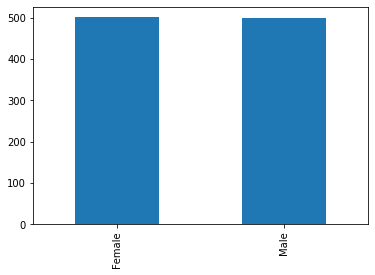

In [9]:
data['Gender'].value_counts().plot(kind='bar');

In [10]:
data_gender_rating = data.groupby('Gender', as_index=False).Rating.mean()
data_gender_rating

,Gender,Rating
0,Female,6.964471
1,Male,6.980962


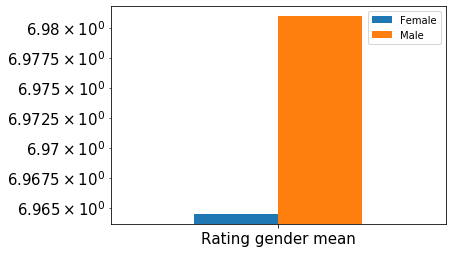

In [11]:
bar("Rating gender mean", data_gender_rating, True)

In [12]:
data_customertype_rating = data.groupby('Customer type', as_index=False).Rating.mean()
data_customertype_rating

,Customer type,Rating
0,Member,6.940319
1,Normal,7.005210


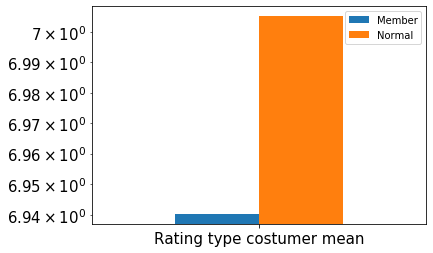

In [13]:
bar("Rating type costumer mean", data_customertype_rating, True)

In [14]:
data_gender_quantity = data.groupby('Gender', as_index=False).Quantity.count()
data_gender_quantity

,Gender,Quantity
0,Female,501
1,Male,499


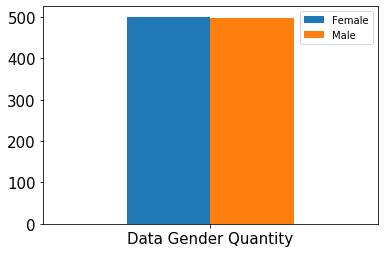

In [15]:
bar("Data Gender Quantity", data_gender_quantity, False)

In [16]:
data_qtt_paymnt = data.groupby('Payment', as_index=False).Quantity.count()
data_qtt_paymnt

,Payment,Quantity
0,Cash,344
1,Credit card,311
2,Ewallet,345


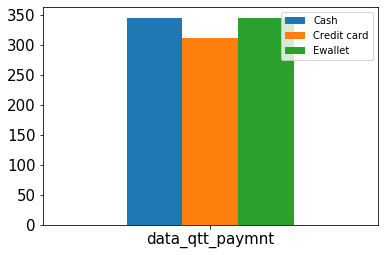

In [17]:
bar3("data_qtt_paymnt", data_qtt_paymnt, False)

In [18]:
data_qtt_city = data.groupby('City', as_index=False).Quantity.count()
data_qtt_city

,City,Quantity
0,Mandalay,332
1,Naypyitaw,328
2,Yangon,340


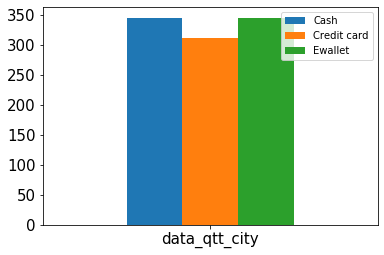

In [19]:
bar3("data_qtt_city", data_qtt_paymnt, False)

In [20]:
data.groupby('Customer type', as_index=False).Quantity.count()

,Customer type,Quantity
0,Member,501
1,Normal,499


In [21]:
data.groupby('Gender', as_index=False).Total.count()

,Gender,Total
0,Female,501
1,Male,499


In [22]:
data_total_sum = data.groupby('Gender', as_index=False).Total.sum()
data_total_sum

,Gender,Total
0,Female,167882.925
1,Male,155083.824


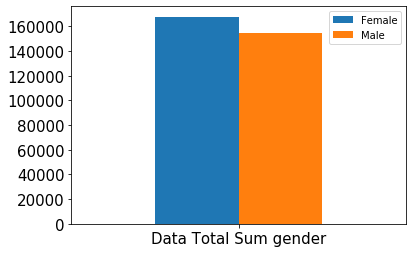

In [23]:
bar("Data Total Sum gender", data_total_sum, False)

In [24]:
data_costumrtype_total_sum = data.groupby('Customer type', as_index=False).Total.sum()
data_costumrtype_total_sum

,Customer type,Total
0,Member,164223.444
1,Normal,158743.305


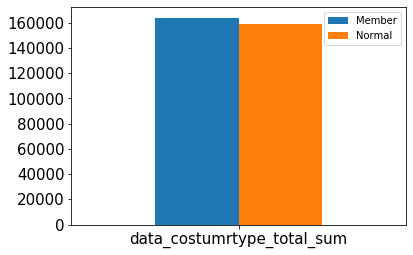

In [25]:
bar("data_costumrtype_total_sum", data_costumrtype_total_sum, False)

#### Datasets by city Naypyitaw, Mandalay, Yangon

In [26]:
data_naypyitaw = data[ data['City'] == 'Naypyitaw']
data_naypyitaw.head()

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross margin percentage,gross income,Rating,Date_time
1,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,Cash,76.40,4.761905,3.8200,9.6,2019-03-08 10:29:00
5,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,2019-03-25,Ewallet,597.73,4.761905,29.8865,4.1,2019-03-25 18:30:00
7,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2019-02-24,Ewallet,735.60,4.761905,36.7800,8.0,2019-02-24 11:38:00
20,Naypyitaw,Member,Male,Electronic accessories,86.04,5,21.5100,451.7100,2019-02-25,Ewallet,430.20,4.761905,21.5100,4.8,2019-02-25 11:24:00
34,Naypyitaw,Member,Female,Food and beverages,99.42,4,19.8840,417.5640,2019-02-06,Ewallet,397.68,4.761905,19.8840,7.5,2019-02-06 10:42:00


In [27]:
data_mandalay = data[ data['City'] == 'Mandalay']
data_mandalay.head()

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross margin percentage,gross income,Rating,Date_time
9,Mandalay,Member,Female,Food and beverages,54.84,3,8.226,172.746,2019-02-20,Credit card,164.52,4.761905,8.226,5.9,2019-02-20 13:27:00
10,Mandalay,Member,Female,Fashion accessories,14.48,4,2.896,60.816,2019-02-06,Ewallet,57.92,4.761905,2.896,4.5,2019-02-06 18:07:00
11,Mandalay,Member,Male,Electronic accessories,25.51,4,5.102,107.142,2019-03-09,Cash,102.04,4.761905,5.102,6.8,2019-03-09 17:03:00
15,Mandalay,Member,Female,Sports and travel,93.72,6,28.116,590.436,2019-01-15,Cash,562.32,4.761905,28.116,4.5,2019-01-15 16:19:00
19,Mandalay,Normal,Female,Home and lifestyle,40.30,2,4.030,84.630,2019-03-11,Ewallet,80.60,4.761905,4.030,4.4,2019-03-11 15:30:00


In [28]:
data_yangon = data[ data['City'] == 'Yangon']
data_yangon.head()

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross margin percentage,gross income,Rating,Date_time
0,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05 13:08:00
2,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03 13:23:00
3,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27 20:33:00
4,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08 10:37:00
6,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2019-02-25,Ewallet,413.04,4.761905,20.6520,5.8,2019-02-25 14:36:00


In [29]:
data = data.sort_values(by='Date_time')
data

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross margin percentage,gross income,Rating,Date_time
17,Yangon,Normal,Male,Sports and travel,72.61,6,21.783,457.443,2019-01-01,Credit card,435.66,4.761905,21.783,6.9,2019-01-01 10:39:00
970,Mandalay,Member,Female,Food and beverages,84.63,10,42.315,888.615,2019-01-01,Credit card,846.30,4.761905,42.315,9.0,2019-01-01 11:36:00
839,Naypyitaw,Member,Female,Sports and travel,29.22,6,8.766,184.086,2019-01-01,Ewallet,175.32,4.761905,8.766,5.0,2019-01-01 11:40:00
523,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,2019-01-01,Cash,125.74,4.761905,6.287,5.0,2019-01-01 11:43:00
567,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,2019-01-01,Cash,591.66,4.761905,29.583,7.7,2019-01-01 13:55:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,Mandalay,Member,Male,Food and beverages,93.40,2,9.340,196.140,2019-03-30,Cash,186.80,4.761905,9.340,5.5,2019-03-30 16:34:00
474,Yangon,Member,Female,Electronic accessories,64.44,5,16.110,338.310,2019-03-30,Cash,322.20,4.761905,16.110,6.6,2019-03-30 17:04:00
473,Mandalay,Member,Male,Health and beauty,72.57,8,29.028,609.588,2019-03-30,Cash,580.56,4.761905,29.028,4.6,2019-03-30 17:58:00
643,Naypyitaw,Member,Female,Food and beverages,72.52,8,29.008,609.168,2019-03-30,Credit card,580.16,4.761905,29.008,4.0,2019-03-30 19:26:00


322966.749

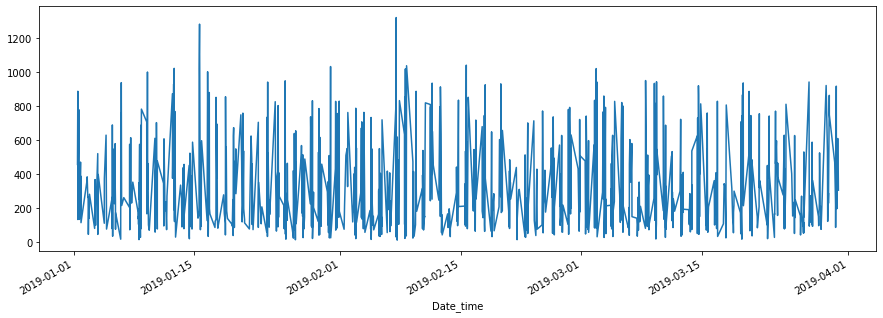

In [30]:
dt = data.groupby(data['Date_time'])['Total'].sum()
data.groupby(data['Date_time'])['Total'].sum().plot(figsize = (15,5))
dt.sum()

106197.67199999999

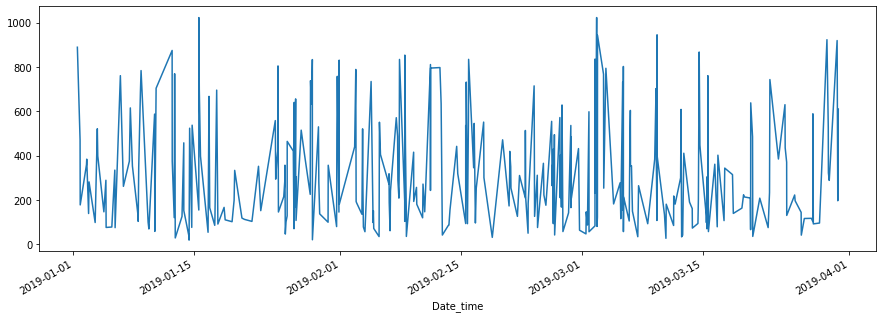

In [31]:
total_mandalay = data_mandalay.groupby(data_mandalay['Date_time'])['Total'].sum().sum()
citys = []
citys.append(total_mandalay)
data_mandalay.groupby(data_mandalay['Date_time'])['Total'].sum().plot(figsize = (15,5))
total_mandalay

106200.3705

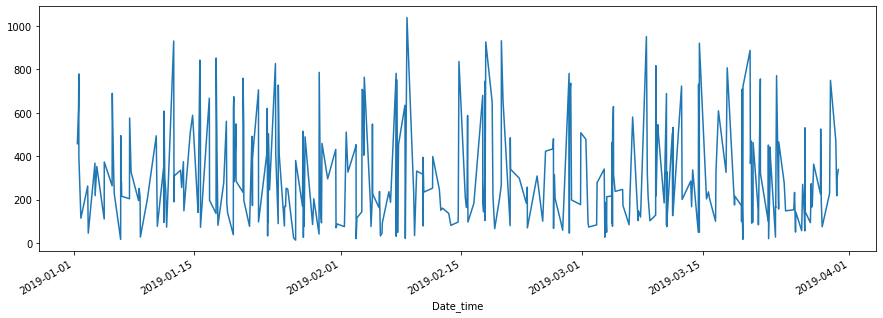

In [32]:
total_yangon = data_yangon.groupby(data_yangon['Date_time'])['Total'].sum().sum()
citys.append(total_yangon)
data_yangon.groupby(data_yangon['Date_time'])['Total'].sum().plot(figsize = (15,5))
total_yangon

110568.70650000001

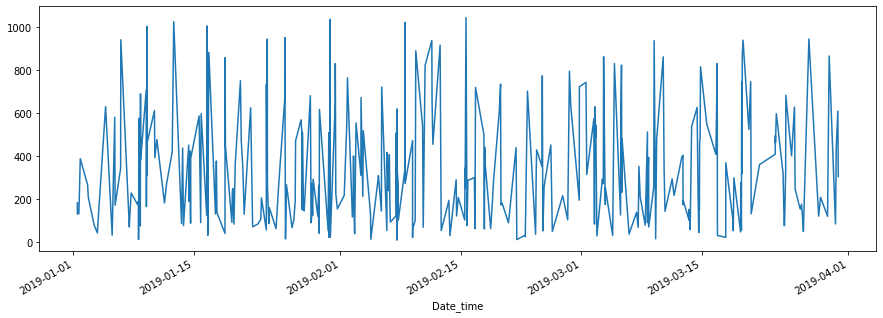

In [33]:
total_napyitaw = data_naypyitaw.groupby(data_naypyitaw['Date_time'])['Total'].sum().sum()
citys.append(total_napyitaw)
data_naypyitaw.groupby(data_naypyitaw['Date_time'])['Total'].sum().plot(figsize = (15,5))
total_napyitaw

In [34]:
citys

[106197.67199999999, 106200.3705, 110568.70650000001]

In [35]:
data['City'].unique()
total_citys = dict(zip(data['City'].unique(), citys))
total_citys

{'Yangon': 106197.67199999999,
 'Mandalay': 106200.3705,
 'Naypyitaw': 110568.70650000001}

In [36]:
dt_total_citys = pd.DataFrame.from_dict(total_citys, orient='index',
                       columns=['Total_Value_Amont'])
dt_total_citys

,Total_Value_Amont
Yangon,106197.6720
Mandalay,106200.3705
Naypyitaw,110568.7065


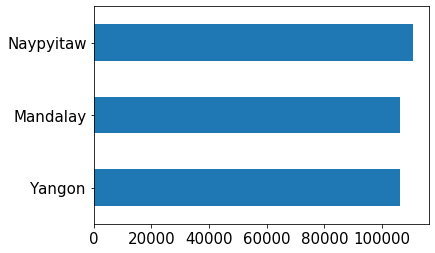

In [37]:
dt_total_citys['Total_Value_Amont'].sort_values().plot(kind='barh', fontsize = 15, logy=False)

In [38]:
data_prodline = pd.DataFrame(data['Product line'].value_counts())
data_prodline

,Product line
Fashion accessories,178
Food and beverages,174
Electronic accessories,170
Sports and travel,166
Home and lifestyle,160
Health and beauty,152


Text(0, 0.5, 'Quantity')

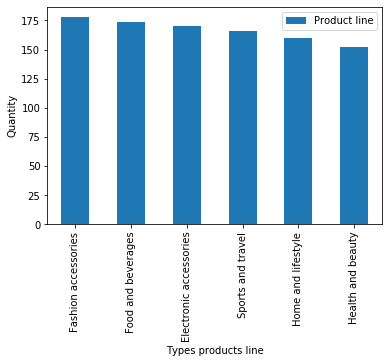

In [39]:
ax = data_prodline.plot(kind='bar', fontsize = 10)
ax.set_xlabel("Types products line")
ax.set_ylabel("Quantity")

#### Learning lambda functions with pandas

In [40]:
list(data['Quantity'].value_counts(sort=False))[0]
pd.Series(
    map( lambda a: list(data['Quantity'].value_counts(sort=False)), range(1,11)),
    index = range(1,11)
)

1     [112, 91, 90, 109, 102, 98, 102, 85, 92, 119]
2     [112, 91, 90, 109, 102, 98, 102, 85, 92, 119]
3     [112, 91, 90, 109, 102, 98, 102, 85, 92, 119]
4     [112, 91, 90, 109, 102, 98, 102, 85, 92, 119]
5     [112, 91, 90, 109, 102, 98, 102, 85, 92, 119]
6     [112, 91, 90, 109, 102, 98, 102, 85, 92, 119]
7     [112, 91, 90, 109, 102, 98, 102, 85, 92, 119]
8     [112, 91, 90, 109, 102, 98, 102, 85, 92, 119]
9     [112, 91, 90, 109, 102, 98, 102, 85, 92, 119]
10    [112, 91, 90, 109, 102, 98, 102, 85, 92, 119]
dtype: object

#### Transform city, customer type, gender, product lin, payment in number before sns correelation

In [41]:
cat_columns = data.select_dtypes(['object']).columns
cat_columns

Index(['City', 'Customer type', 'Gender', 'Product line', 'Payment'], dtype='object')

In [42]:
data_dummies = pd.get_dummies(data, columns=cat_columns, prefix=cat_columns, drop_first=True)
data_dummies.head()

,Unit price,Quantity,Tax 5%,Total,Date,cogs,gross margin percentage,gross income,Rating,Date_time,...,City_Yangon,Customer type_Normal,Gender_Male,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Credit card,Payment_Ewallet
17,72.61,6,21.783,457.443,2019-01-01,435.66,4.761905,21.783,6.9,2019-01-01 10:39:00,...,1,1,1,0,0,0,0,1,1,0
970,84.63,10,42.315,888.615,2019-01-01,846.30,4.761905,42.315,9.0,2019-01-01 11:36:00,...,0,0,0,0,1,0,0,0,1,0
839,29.22,6,8.766,184.086,2019-01-01,175.32,4.761905,8.766,5.0,2019-01-01 11:40:00,...,0,0,0,0,0,0,0,1,0,1
523,62.87,2,6.287,132.027,2019-01-01,125.74,4.761905,6.287,5.0,2019-01-01 11:43:00,...,0,1,1,0,0,1,0,0,0,0
567,65.74,9,29.583,621.243,2019-01-01,591.66,4.761905,29.583,7.7,2019-01-01 13:55:00,...,1,1,0,1,0,0,0,0,0,0


### Correlation features

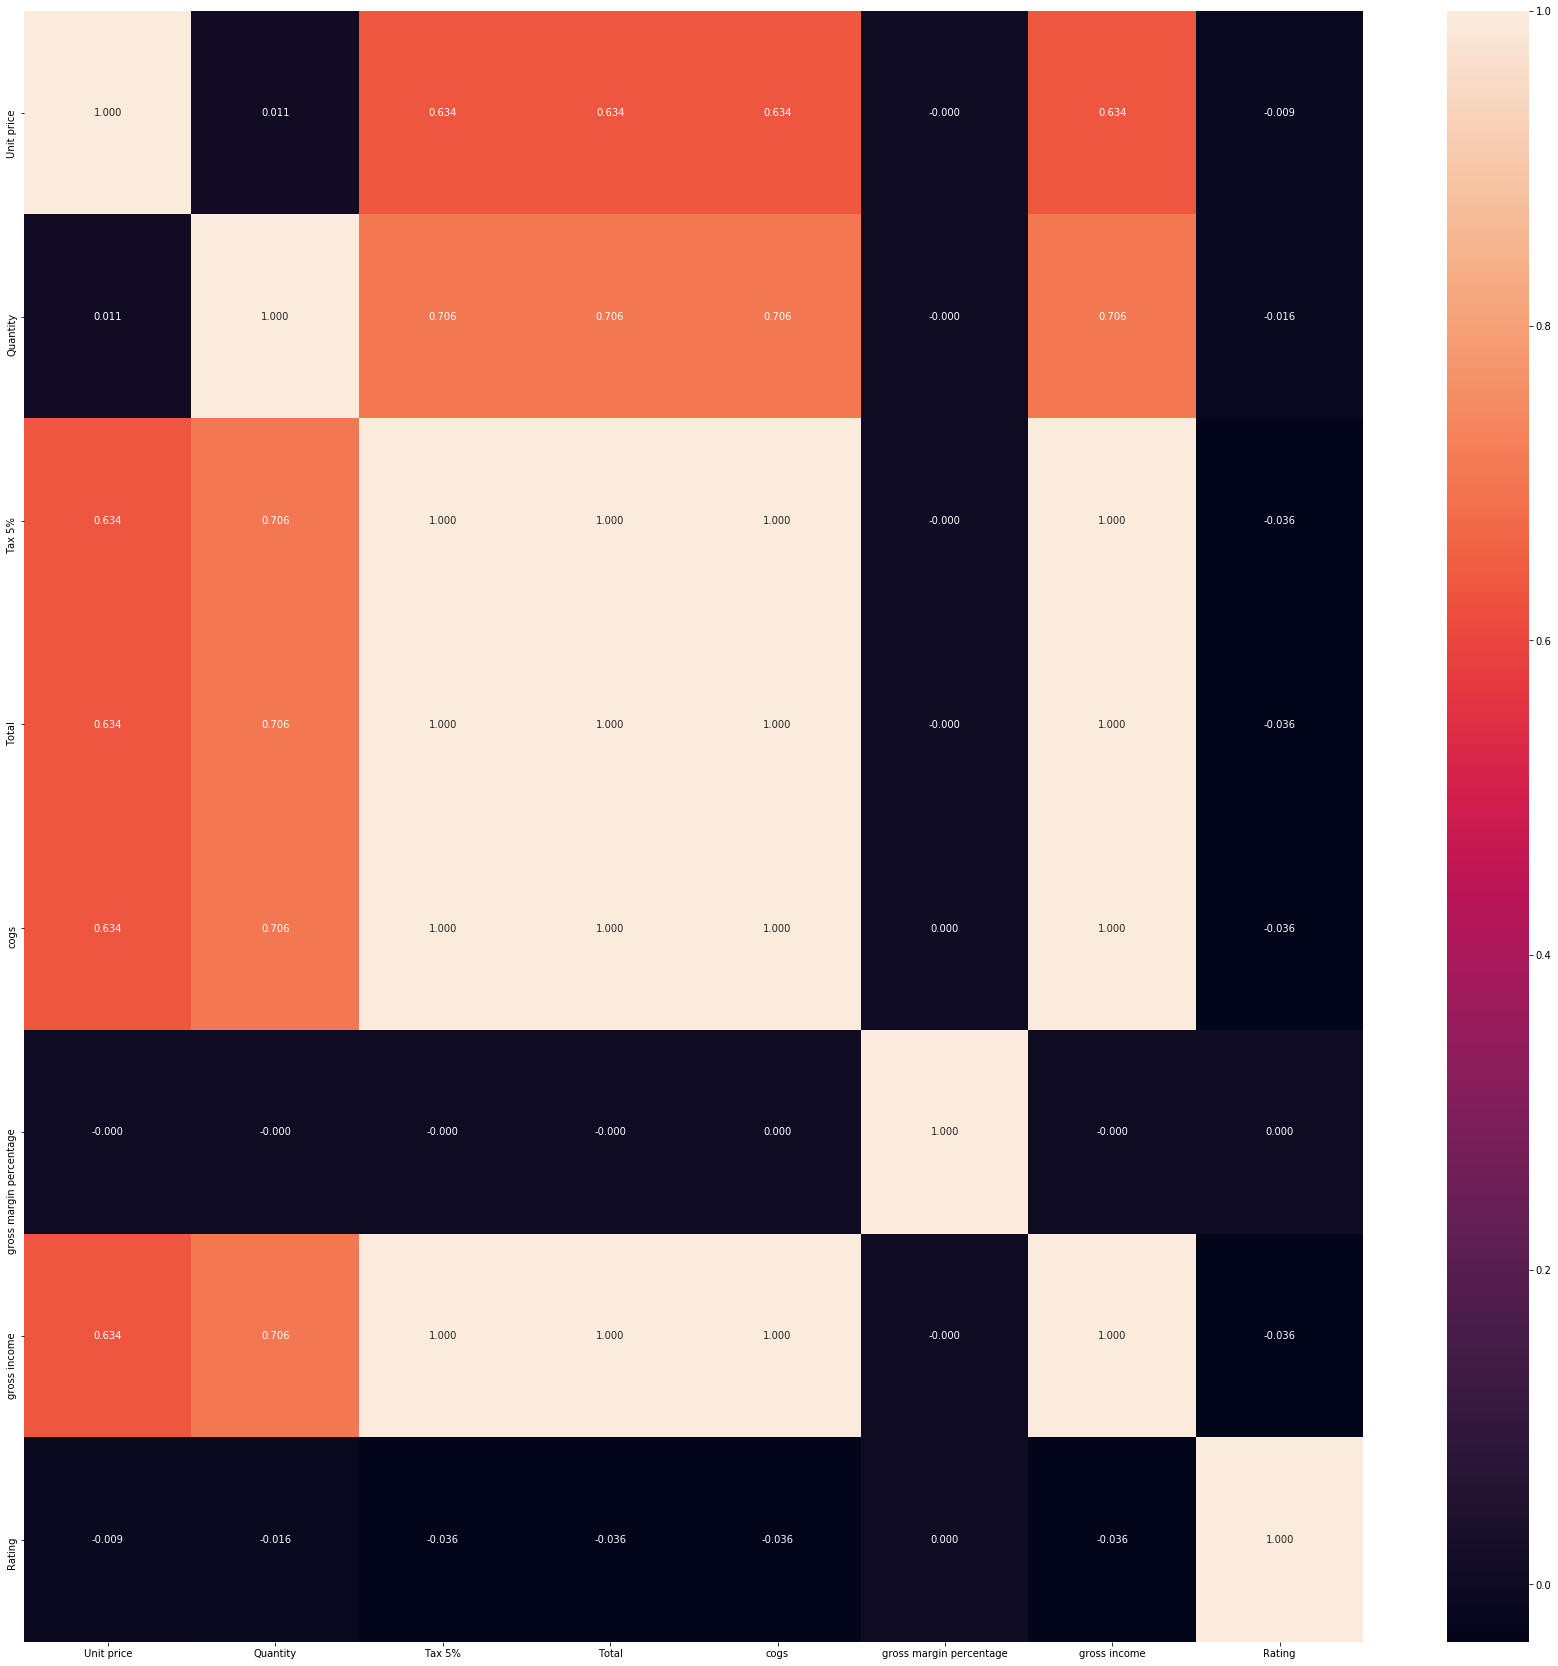

In [43]:
fig= plt.figure(figsize=(30,30))
sns.heatmap(data.corr(), annot=True, fmt='.3f')
sns.set_style("whitegrid")
plt.show()

## Prophet  time series (facebook bib)

In [44]:
data_mandalay.sort_values('Date_time', inplace=True)
data_mandalay.tail(10)

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross margin percentage,gross income,Rating,Date_time
159,Mandalay,Normal,Male,Sports and travel,93.39,6,28.0170,588.3570,2019-03-27,Ewallet,560.34,4.761905,28.0170,10.0,2019-03-27 19:18:00
910,Mandalay,Member,Female,Food and beverages,29.15,3,4.3725,91.8225,2019-03-27,Credit card,87.45,4.761905,4.3725,7.3,2019-03-27 20:29:00
208,Mandalay,Normal,Female,Fashion accessories,30.37,3,4.5555,95.6655,2019-03-28,Ewallet,91.11,4.761905,4.5555,5.1,2019-03-28 13:41:00
96,Mandalay,Normal,Male,Health and beauty,87.87,10,43.9350,922.6350,2019-03-29,Ewallet,878.70,4.761905,43.9350,5.1,2019-03-29 10:25:00
705,Mandalay,Normal,Male,Health and beauty,71.77,7,25.1195,527.5095,2019-03-29,Cash,502.39,4.761905,25.1195,8.9,2019-03-29 14:06:00
508,Mandalay,Member,Male,Health and beauty,61.29,5,15.3225,321.7725,2019-03-29,Cash,306.45,4.761905,15.3225,7.0,2019-03-29 14:28:00
516,Mandalay,Member,Male,Health and beauty,54.86,5,13.7150,288.0150,2019-03-29,Ewallet,274.30,4.761905,13.7150,9.8,2019-03-29 16:48:00
158,Mandalay,Member,Male,Health and beauty,97.22,9,43.7490,918.7290,2019-03-30,Ewallet,874.98,4.761905,43.7490,6.0,2019-03-30 14:43:00
671,Mandalay,Member,Male,Food and beverages,93.40,2,9.3400,196.1400,2019-03-30,Cash,186.80,4.761905,9.3400,5.5,2019-03-30 16:34:00
473,Mandalay,Member,Male,Health and beauty,72.57,8,29.0280,609.5880,2019-03-30,Cash,580.56,4.761905,29.0280,4.6,2019-03-30 17:58:00


In [45]:
data_mandalay['Date'].value_counts()

2019-03-05    10
2019-01-26    10
2019-03-02     9
2019-02-25     8
2019-03-15     8
              ..
2019-02-19     1
2019-02-18     1
2019-03-21     1
2019-03-23     1
2019-01-21     1
Name: Date, Length: 86, dtype: int64

In [46]:
rating_max =  data_mandalay[['Date_time', 'Rating']]
rating_max.columns = ['ds', 'y']
rating_max.tail(20)

,ds,y
907,2019-03-24 14:08:00,6.6
662,2019-03-24 18:14:00,5.9
216,2019-03-24 18:27:00,8.5
820,2019-03-25 16:32:00,6.7
503,2019-03-25 17:53:00,6.3
520,2019-03-26 10:34:00,7.7
449,2019-03-26 11:02:00,9.6
748,2019-03-26 19:28:00,8.0
642,2019-03-27 15:08:00,6.0
701,2019-03-27 19:11:00,4.3


In [47]:
rating_max['ds'].value_counts()

2019-03-02 19:26:00    2
2019-01-04 13:24:00    1
2019-02-07 15:06:00    1
2019-02-13 13:59:00    1
2019-02-05 15:26:00    1
                      ..
2019-03-15 16:26:00    1
2019-03-16 18:51:00    1
2019-03-05 20:24:00    1
2019-03-06 13:46:00    1
2019-03-01 20:03:00    1
Name: ds, Length: 331, dtype: int64

#### train and test with just a day

In [48]:
train = rating_max[rating_max['ds'].dt.date == pd.to_datetime('2019-01-26')]
test = rating_max[rating_max['ds'].dt.date == pd.to_datetime('2019-03-05')]

In [49]:
train.shape, test.shape

((10, 2), (10, 2))

In [50]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true = y_true.values
    y_pred = y_pred.values
    return np.mean(np.abs((y_true - y_pred) / y_true))

In [51]:
print('baseline: ', mean_absolute_percentage_error(train['y'], test['y']))

baseline:  0.39045046244286685


In [52]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [53]:
prophet =  Prophet()
prophet.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


In [54]:
future = prophet.make_future_dataframe(10, include_history=False, freq='H')
future.tail()

,ds
5,2019-01-27 02:23:00
6,2019-01-27 03:23:00
7,2019-01-27 04:23:00
8,2019-01-27 05:23:00
9,2019-01-27 06:23:00


In [55]:
predict =  prophet.predict(future)

In [56]:
predict.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-26 21:23:00,4.638402,2.705254,6.681385,4.638402,4.638402,0.0,0.0,0.0,0.0,0.0,0.0,4.638402
1,2019-01-26 22:23:00,4.166239,2.079819,6.159200,4.166239,4.166240,0.0,0.0,0.0,0.0,0.0,0.0,4.166239
2,2019-01-26 23:23:00,3.694077,1.785176,5.629794,3.694077,3.694077,0.0,0.0,0.0,0.0,0.0,0.0,3.694077
3,2019-01-27 00:23:00,3.221915,1.263823,5.106725,3.221915,3.221915,0.0,0.0,0.0,0.0,0.0,0.0,3.221915
4,2019-01-27 01:23:00,2.749753,0.774833,4.749226,2.749753,2.749753,0.0,0.0,0.0,0.0,0.0,0.0,2.749753


In [57]:
mean_absolute_percentage_error(test['y'], predict['yhat'])

0.5917483411021857

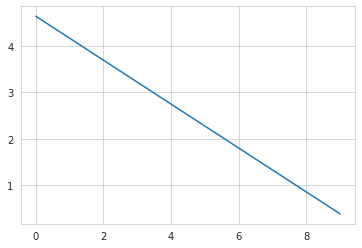

In [58]:
predict['yhat'].plot()

In [59]:
#print(rating_max[rating_max['ds'].isin(pd.date_range(
#    '2019-01-01', '2019-03-29 16:48:00', freq='day'))])

In [60]:
def run_propeht(train, test):
    prophet =  Prophet()
    prophet.fit(train)
    
    future = prophet.make_future_dataframe(10, include_history=False, freq='H')
    predict =  prophet.predict(future)
    
    return prophet, predict, mean_absolute_percentage_error(test['y'], predict['yhat'])

In [61]:
run_propeht(train, test)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


(<fbprophet.forecaster.Prophet at 0x7f7393561d30>,
                    ds     trend  yhat_lower  yhat_upper  trend_lower  \
 0 2019-01-26 21:23:00  4.638402    2.697072    6.631005     4.638402   
 1 2019-01-26 22:23:00  4.166239    2.123343    6.279284     4.166239   
 2 2019-01-26 23:23:00  3.694077    1.629024    5.701011     3.694077   
 3 2019-01-27 00:23:00  3.221915    1.300953    5.414584     3.221915   
 4 2019-01-27 01:23:00  2.749753    0.771627    4.707031     2.749753   
 5 2019-01-27 02:23:00  2.277591    0.278078    4.107090     2.277590   
 6 2019-01-27 03:23:00  1.805428   -0.148226    3.844138     1.805428   
 7 2019-01-27 04:23:00  1.333266   -0.609869    3.383771     1.333266   
 8 2019-01-27 05:23:00  0.861104   -1.042187    2.881755     0.861104   
 9 2019-01-27 06:23:00  0.388942   -1.589537    2.320282     0.388941   
 
    trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
 0     4.638402             0.0                   0.0            

### tests with dataset training with more days

#### new data_set prodline sports with normalization quantity by total value

In [62]:
data_prodline_sports = data[data['Product line'] == 'Sports and travel']
data_prodline_sports = data_prodline_sports.sort_values(by='Date_time')
data_prodline_sports['Total'] = data_prodline_sports['Total'] / data_prodline_sports['Quantity']
data_prodline_sports['Quantity'] = data_prodline_sports['Quantity'] / data_prodline_sports['Quantity'] 
                        
data_prodline_sports.head()

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross margin percentage,gross income,Rating,Date_time
17,Yangon,Normal,Male,Sports and travel,72.61,1.0,21.783,76.2405,2019-01-01,Credit card,435.66,4.761905,21.783,6.9,2019-01-01 10:39:00
839,Naypyitaw,Member,Female,Sports and travel,29.22,1.0,8.766,30.6810,2019-01-01,Ewallet,175.32,4.761905,8.766,5.0,2019-01-01 11:40:00
484,Naypyitaw,Member,Female,Sports and travel,36.98,1.0,18.490,38.8290,2019-01-01,Credit card,369.80,4.761905,18.490,7.0,2019-01-01 19:48:00
696,Yangon,Member,Female,Sports and travel,27.04,1.0,5.408,28.3920,2019-01-01,Ewallet,108.16,4.761905,5.408,6.9,2019-01-01 20:26:00
744,Naypyitaw,Member,Female,Sports and travel,31.67,1.0,12.668,33.2535,2019-01-02,Credit card,253.36,4.761905,12.668,5.6,2019-01-02 16:19:00


In [63]:
data_prodline_sports.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,166.000000,166.0,166.000000,166.000000,166.000000,1.660000e+02,166.000000,166.000000
mean,56.993253,1.0,15.812630,59.842916,316.252590,4.761905e+00,15.812630,6.916265
std,26.905015,0.0,11.827397,28.250266,236.547931,8.908658e-16,11.827397,1.714477
min,10.170000,1.0,0.508500,10.678500,10.170000,4.761905e+00,0.508500,4.000000
25%,34.417500,1.0,6.345750,36.138375,126.915000,4.761905e+00,6.345750,5.525000
50%,58.650000,1.0,12.901500,61.582500,258.030000,4.761905e+00,12.901500,6.700000
75%,80.680000,1.0,22.746875,84.714000,454.937500,4.761905e+00,22.746875,8.450000
max,99.960000,1.0,47.720000,104.958000,954.400000,4.761905e+00,47.720000,10.000000


In [64]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()

In [65]:
scaler.fit(data_prodline_sports[['Total']])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [66]:
data_prodline_sports[['Total']] = scaler.transform(data_prodline_sports[['Total']])
data_prodline_sports[['Total']] = scaler.transform(data_prodline_sports[['Total']])

In [67]:
data_prodline_sports.head()

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross margin percentage,gross income,Rating,Date_time
17,Yangon,Normal,Male,Sports and travel,72.61,1.0,21.783,-0.105888,2019-01-01,Credit card,435.66,4.761905,21.783,6.9,2019-01-01 10:39:00
839,Naypyitaw,Member,Female,Sports and travel,29.22,1.0,8.766,-0.111014,2019-01-01,Ewallet,175.32,4.761905,8.766,5.0,2019-01-01 11:40:00
484,Naypyitaw,Member,Female,Sports and travel,36.98,1.0,18.490,-0.110097,2019-01-01,Credit card,369.80,4.761905,18.490,7.0,2019-01-01 19:48:00
696,Yangon,Member,Female,Sports and travel,27.04,1.0,5.408,-0.111271,2019-01-01,Ewallet,108.16,4.761905,5.408,6.9,2019-01-01 20:26:00
744,Naypyitaw,Member,Female,Sports and travel,31.67,1.0,12.668,-0.110725,2019-01-02,Credit card,253.36,4.761905,12.668,5.6,2019-01-02 16:19:00


In [68]:
data_prodline_sports.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,166.000000,166.0,166.000000,166.000000,166.000000,1.660000e+02,166.000000,166.000000
mean,56.993253,1.0,15.812630,-0.107733,316.252590,4.761905e+00,15.812630,6.916265
std,26.905015,0.0,11.827397,0.003178,236.547931,8.908658e-16,11.827397,1.714477
min,10.170000,1.0,0.508500,-0.113264,10.170000,4.761905e+00,0.508500,4.000000
25%,34.417500,1.0,6.345750,-0.110400,126.915000,4.761905e+00,6.345750,5.525000
50%,58.650000,1.0,12.901500,-0.107537,258.030000,4.761905e+00,12.901500,6.700000
75%,80.680000,1.0,22.746875,-0.104935,454.937500,4.761905e+00,22.746875,8.450000
max,99.960000,1.0,47.720000,-0.102658,954.400000,4.761905e+00,47.720000,10.000000


In [69]:
total_sports =  data_prodline_sports[['Date_time', 'Total']]
total_sports.columns = ['ds', 'y']
total_sports = total_sports.drop([822])
total_sports.sort_values(by='y')

,ds,y
832,2019-01-09 16:34:00,-0.113066
184,2019-03-04 11:19:00,-0.113008
861,2019-01-08 18:06:00,-0.112958
767,2019-02-13 13:59:00,-0.112848
368,2019-01-27 14:28:00,-0.112769
...,...,...
498,2019-01-21 17:36:00,-0.102874
265,2019-03-12 12:43:00,-0.102842
664,2019-02-21 11:39:00,-0.102795
435,2019-03-19 19:09:00,-0.102743


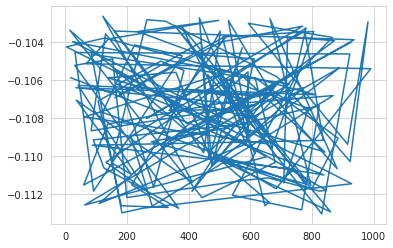

In [70]:
total_sports['y'].plot()

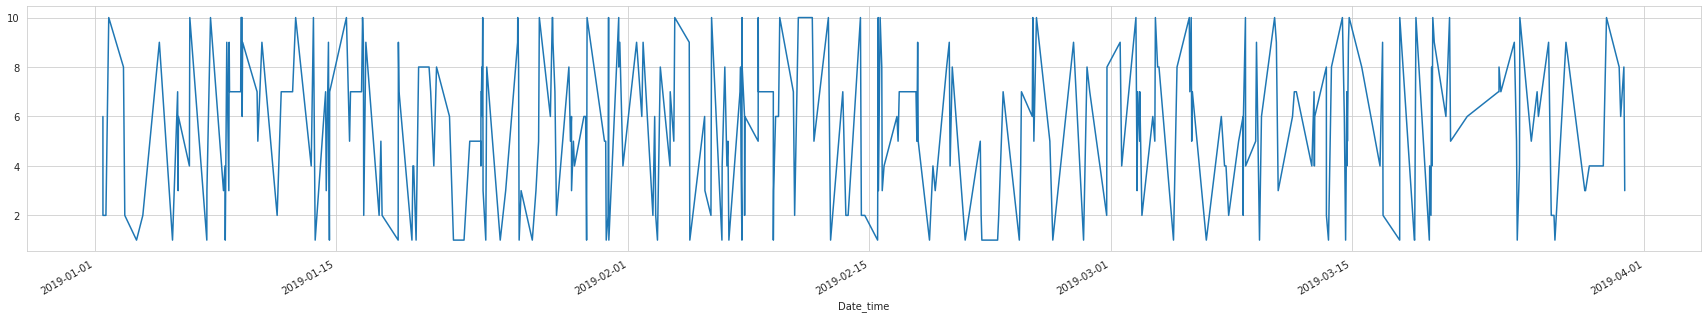

In [71]:
data_naypyitaw.groupby(data_naypyitaw['Date_time'])['Quantity'].sum().plot(figsize = (30,5))

In [72]:
total_sports.shape

(165, 2)

In [102]:
train = total_sports[:17]
test = total_sports[17:34]

In [103]:
print('baseline: ', mean_absolute_percentage_error(train['y'], test['y']))

baseline:  0.03614363343515732


In [75]:
###

In [104]:
prophet =  Prophet()
prophet.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 12.


In [105]:
future = prophet.make_future_dataframe(17, include_history=False, freq='H')
future.tail()

,ds
12,2019-01-09 07:06:00
13,2019-01-09 08:06:00
14,2019-01-09 09:06:00
15,2019-01-09 10:06:00
16,2019-01-09 11:06:00


In [106]:
predict =  prophet.predict(future)

In [108]:
predict.head(20)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-08 19:06:00,0.168161,-0.114572,-0.111354,0.168161,0.168161,-0.281068,-0.281068,-0.281068,-0.281068,-0.281068,-0.281068,0.0,0.0,0.0,-0.112906
1,2019-01-08 20:06:00,0.168132,-0.113467,-0.110039,0.168132,0.168132,-0.279918,-0.279918,-0.279918,-0.279918,-0.279918,-0.279918,0.0,0.0,0.0,-0.111786
2,2019-01-08 21:06:00,0.168102,-0.123070,-0.119728,0.168102,0.168102,-0.289477,-0.289477,-0.289477,-0.289477,-0.289477,-0.289477,0.0,0.0,0.0,-0.121375
3,2019-01-08 22:06:00,0.168073,-0.150233,-0.146939,0.168072,0.168073,-0.316612,-0.316612,-0.316612,-0.316612,-0.316612,-0.316612,0.0,0.0,0.0,-0.148539
4,2019-01-08 23:06:00,0.168043,-0.169048,-0.165719,0.168041,0.168044,-0.335417,-0.335417,-0.335417,-0.335417,-0.335417,-0.335417,0.0,0.0,0.0,-0.167373
5,2019-01-09 00:06:00,0.168014,-0.114048,-0.110606,0.168010,0.168017,-0.280402,-0.280402,-0.280402,-0.280402,-0.280402,-0.280402,0.0,0.0,0.0,-0.112388
6,2019-01-09 01:06:00,0.167984,0.082747,0.086116,0.167977,0.167991,-0.083581,-0.083581,-0.083581,-0.083581,-0.083581,-0.083581,0.0,0.0,0.0,0.084403
7,2019-01-09 02:06:00,0.167955,0.428986,0.432385,0.167944,0.167965,0.262660,0.262660,0.262660,0.262660,0.262660,0.262660,0.0,0.0,0.0,0.430615
8,2019-01-09 03:06:00,0.167926,0.834899,0.838163,0.167910,0.167940,0.668661,0.668661,0.668661,0.668661,0.668661,0.668661,0.0,0.0,0.0,0.836586
9,2019-01-09 04:06:00,0.167896,1.144267,1.147521,0.167877,0.167914,0.978014,0.978014,0.978014,0.978014,0.978014,0.978014,0.0,0.0,0.0,1.145910


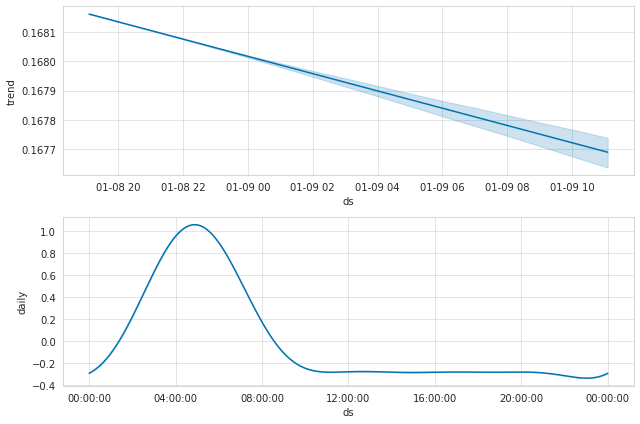

In [109]:
fig =  prophet.plot_components(predict)

In [110]:
mean_absolute_percentage_error(test['y'], predict['yhat'])

3.7514902632579195